In [63]:
# importing required libraries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.optimize import curve_fit
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
sb.set()

In [64]:
# loading data
ds = pd.read_csv('aggregate_covid_country.csv')
ds.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0


In [65]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23688 entries, 0 to 23687
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       23688 non-null  object
 1   Country    23688 non-null  object
 2   Confirmed  23688 non-null  int64 
 3   Recovered  23688 non-null  int64 
 4   Deaths     23688 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 925.4+ KB


In [66]:
# converting Date column into dataetime format
ds['Date']  = pd.to_datetime(ds['Date'])

In [67]:
# defining function to extract categorical date information like month, year, weekday.
def to_date_time(col, df):
    df[col] = pd.to_datetime(df[col], infer_datetime_format = True)
        
    if len(df[col].dt.year.unique()) != 1:
        df[col+'(year)'] = df[col].dt.year
    else:
        pass
    if len(df[col].dt.month.unique()) != 1:
        df[col+'(month)'] = df[col].dt.month
        
        month_map = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May',
            6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
        df[col+'(month)'] = df[col+'(month)'].map(month_map)
    
    else:
        pass
    if len(df[col].dt.dayofweek.unique()) != 1:
        df[col+'(weekday)'] = df[col].dt.dayofweek
        
        weekday_map = {6:'SUN', 5:'SAT', 4:'FRI', 3:'THU', 2:'WED', 1:'TUE', 0: 'MON'}
        df[col+'(weekday)'] = df[col+'(weekday)'].map(weekday_map)
        
    return df  

In [68]:
# extracting month and weekday from date column
to_date_time('Date', ds)

,Date,Country,Confirmed,Recovered,Deaths,Date(month),Date(weekday)
0,2020-01-22,Afghanistan,0,0,0,Jan,WED
1,2020-01-22,Albania,0,0,0,Jan,WED
2,2020-01-22,Algeria,0,0,0,Jan,WED
3,2020-01-22,Andorra,0,0,0,Jan,WED
4,2020-01-22,Angola,0,0,0,Jan,WED
...,...,...,...,...,...,...,...
23683,2020-05-26,West Bank and Gaza,429,365,3,May,TUE
23684,2020-05-26,Western Sahara,9,6,1,May,TUE
23685,2020-05-26,Yemen,249,10,49,May,TUE
23686,2020-05-26,Zambia,920,336,7,May,TUE


###  Aggregate analysis of effect of COVID-19 by Country

In [69]:
total_case = ds.groupby(['Country']).Confirmed.agg(['sum']).sort_values('sum',
                            ascending = False).rename(columns = dict(sum = 'Total Case'))
total_case.head()

,Total Case
Country,
US,57098767
Italy,11896347
Spain,11890691
United Kingdom,9150537
Germany,9046257


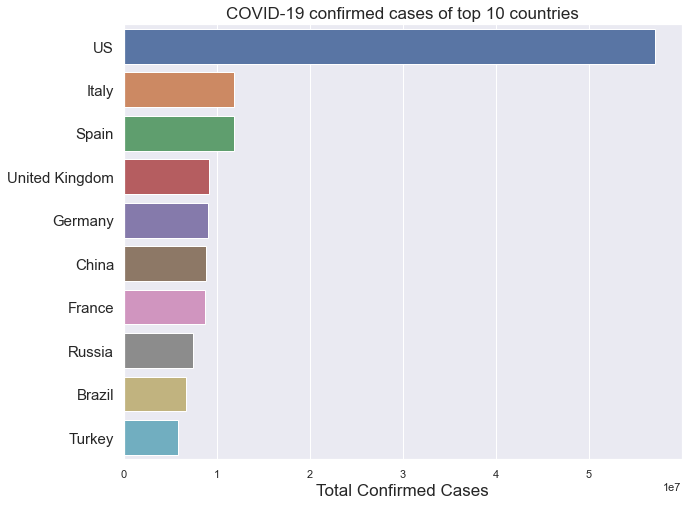

In [70]:
fig = plt.figure()
ax =  fig.add_subplot(111)
sb.barplot(y =  total_case.index[:10], x = 'Total Case',
           data = total_case.head(10))
ax.set_yticklabels(total_case.index[:10],
                  fontsize = 15)
plt.ylabel('', fontsize = 20)
plt.xlabel('Total Confirmed Cases', fontsize = 17)
plt.title('COVID-19 confirmed cases of top 10 countries', fontsize = 17)

fig.set_size_inches(10,8)
plt.show() 

### US and most of the European countries were effected most by the COVID virus, even though these  countries are geographically far apart from China where the virus originally transmitted.This could  possibly be due to transmission power of COVID virus and unable to implement the protocols on time.

In [71]:
total_deaths = ds.groupby(['Country']).Deaths.agg(['sum']).sort_values('sum',
                            ascending = False).rename(columns = dict(sum = 'Total Death'))
total_deaths.head()

,Total Death
Country,
US,3221969
Italy,1568276
United Kingdom,1329006
Spain,1302010
France,1209634


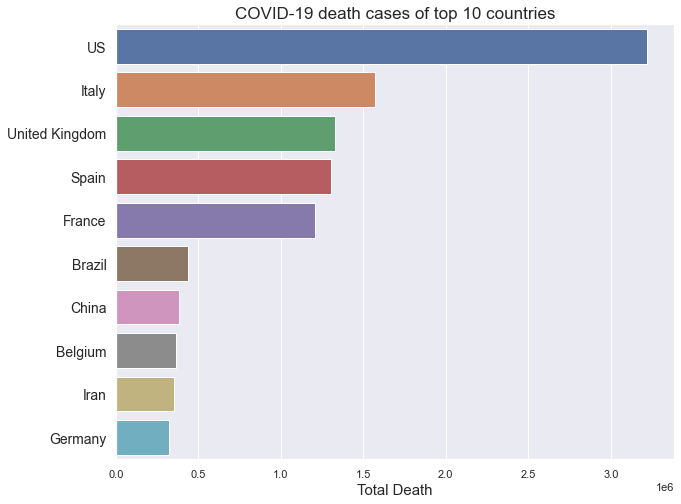

In [72]:
fig = plt.figure()
ax =  fig.add_subplot(111)
sb.barplot(y =  total_deaths.index[:10], x = 'Total Death',
           data = total_deaths.head(10))
ax.set_yticklabels(total_deaths.index[:10],
                  fontsize = 14)

plt.ylabel('', fontsize = 15)
plt.xlabel('Total Death', fontsize = 15)
plt.title('COVID-19 death cases of top 10 countries', fontsize = 17)

fig.set_size_inches(10,8)
plt.show() 

### Due to highest confirmed cases in US, Italy, United Kingdom and others, it was obvious that even the  high standards healtcare systems on these countries was not enough to provide the 'exponentially' growing infected population at these regions. Hence, due to these factor, the death toll on these counrties were highest among others.

In [73]:
total_recovered = ds.groupby(['Country']).Recovered.agg(['sum']).sort_values('sum',
                            ascending = False).rename(columns = dict(sum = 'Total Recovered'))
total_recovered.head()

,Total Recovered
Country,
US,8428678
China,6776464
Germany,6102898
Spain,5770271
Italy,4354815


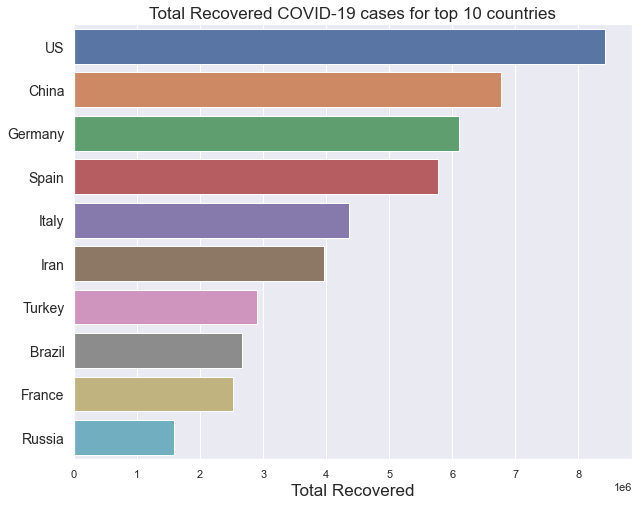

In [74]:
fig = plt.figure()
ax =  fig.add_subplot(111)
sb.barplot(y =  total_recovered.index[:10], x = 'Total Recovered',
           data = total_recovered.head(10))
ax.set_yticklabels(total_recovered.index[:10],
                  fontsize = 14)
plt.ylabel('')
plt.xlabel('Total Recovered', fontsize = 17)
plt.title('Total Recovered COVID-19 cases for top 10 countries', fontsize = 17)

fig.set_size_inches(10,8)
plt.show() 

### Total recovered trend of the countries from above bar graph gives us the insight of its healtcare and medical capacity to increase the recovered cases.

In [75]:
death_rate = pd.merge(total_case,total_deaths,
         left_index=True, right_index = True)
death_rate['Case fatality ratio (CFR)%'] =  (death_rate['Total Death']/ death_rate['Total Case'])*100
death_rate= death_rate.sort_values('Case fatality ratio (CFR)%', ascending = False)
death_rate.head()

,Total Case,Total Death,Case fatality ratio (CFR)%
Country,,,
MS Zaandam,512,112,21.875000
Yemen,2696,460,17.062315
Belgium,2480956,362702,14.619445
United Kingdom,9150537,1329006,14.523803
France,8746538,1209634,13.829860


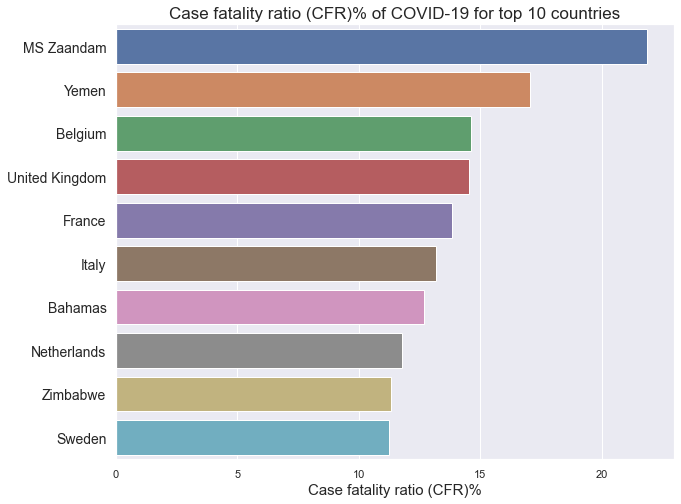

In [76]:
fig = plt.figure()
ax =  fig.add_subplot(111)
sb.barplot(y =  death_rate.index[:10], x = 'Case fatality ratio (CFR)%',
           data = death_rate.head(10))
ax.set_yticklabels(death_rate.index[:10],
                  fontsize = 14)
plt.ylabel('')
plt.xlabel('Case fatality ratio (CFR)%', fontsize = 15)
plt.title('Case fatality ratio (CFR)% of COVID-19 for top 10 countries', fontsize = 17)

fig.set_size_inches(10,8)
plt.show() 

### Italy being the epicentre and having highest amount of total cases on Europe at early stage may have triggered the spread of virus to its neighboring countries and regions. Also, most of the top CFR of these European countries suggest that,  people at these regions may have low immunity to survive the disease.

In [77]:
recovery_ratio = pd.merge(total_case,total_recovered,
         left_index=True, right_index = True)
recovery_ratio['Recovery ratio(%)'] = ( recovery_ratio['Total Recovered']/ recovery_ratio['Total Case'])*100
recovery_ratio = recovery_ratio.sort_values('Recovery ratio(%)', ascending = False)
recovery_ratio.head()

,Total Case,Total Recovered,Recovery ratio(%)
Country,,,
China,8871610,6776464,76.383700
Cambodia,8024,5888,73.379860
Thailand,170005,124172,73.040205
Iceland,108279,78437,72.439716
Saint Lucia,974,695,71.355236


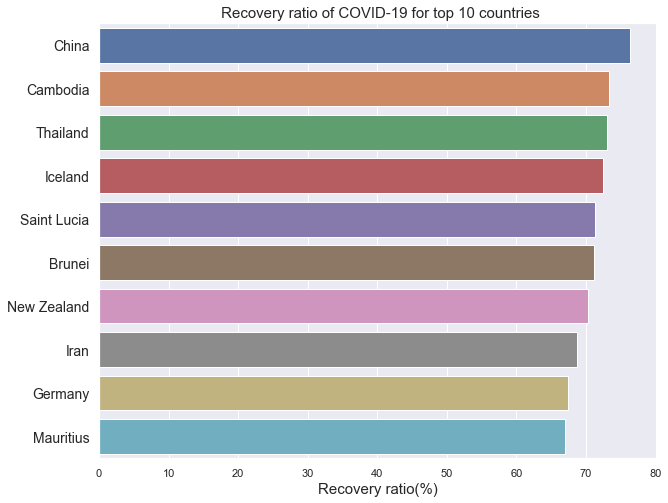

In [78]:
fig = plt.figure()
ax =  fig.add_subplot(111)
sb.barplot(y =  recovery_ratio.index[:10], x = 'Recovery ratio(%)',
           data = recovery_ratio.head(10))
ax.set_yticklabels(recovery_ratio.index[:10],
                  fontsize = 14)
plt.ylabel('')
plt.xlabel('Recovery ratio(%)', fontsize = 15)
plt.title(' Recovery ratio of COVID-19 for top 10 countries', fontsize = 15)

fig.set_size_inches(10,8)
plt.show() 

### Although, the disease initially started from China but the above graph suggests that it was able to control and recover the infected population, probably due to strict government response to the out-break of the disease at that time.

In [79]:
total_recovered = ds.groupby(['Country']).Recovered.agg(['sum']).sort_values('sum',
                            ascending = False).rename(columns = dict(sum = 'Total Recovered'))
total_recovered.head()

,Total Recovered
Country,
US,8428678
China,6776464
Germany,6102898
Spain,5770271
Italy,4354815


In [80]:
weekday_deaths = ds.groupby(['Date(weekday)']).Deaths.agg(['sum']).sort_values('sum',
                            ascending = False).rename(columns = dict(sum = 'weekday_deaths'))
weekday_deaths.head()

,weekday_deaths
Date(weekday),
TUE,1928143
MON,1870919
SUN,1830007
SAT,1791089
FRI,1742311


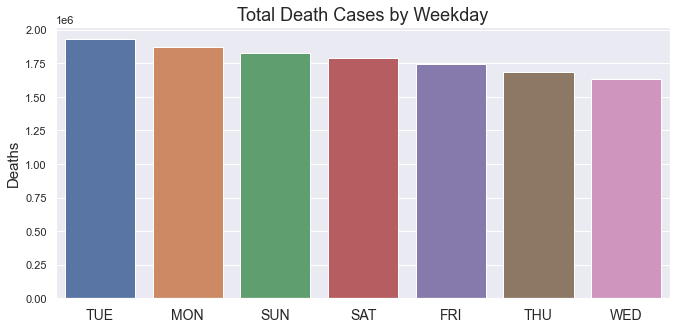

In [81]:
fig = plt.figure()
ax =  fig.add_subplot(111)
sb.barplot(x =  weekday_deaths.index, y = 'weekday_deaths',
           data = weekday_deaths)
ax.set_xticklabels(weekday_deaths.index, fontsize = 14)
plt.ylabel('Deaths' , fontsize = 15)
plt.xlabel('')
plt.title('Total Death Cases by Weekday', fontsize = 18)

fig.set_size_inches(11,5)
plt.show()

### From above graph, although we don't see strong dependency of death cases with respect to weekdays, but on Tuesdays the death toll is the highest, whereas on Wednesdays it is the lowest. 

In [82]:
month_deaths = ds.groupby(['Date(month)']).Deaths.agg(['sum']).sort_values('sum').rename(columns = dict(sum = 'month_deaths'))

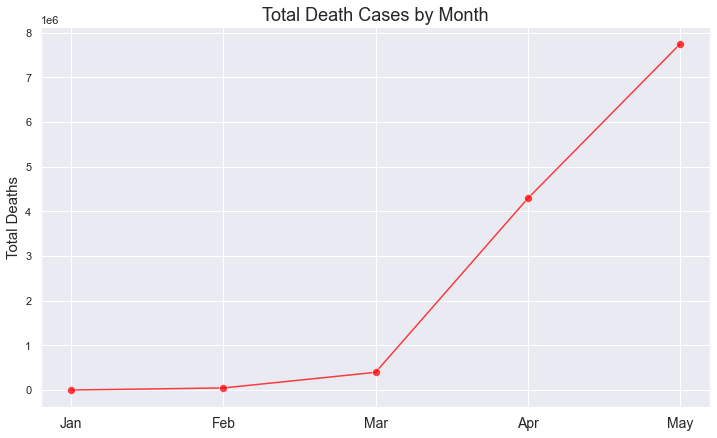

In [83]:
fig = plt.figure()
ax =  fig.add_subplot(111)
sb.lineplot(x =  month_deaths.index, y = 'month_deaths',
           data = month_deaths, marker="o", markersize = 8,  color='red', alpha = 0.75 )
ax.set_xticklabels(month_deaths.index, fontsize = 14)
plt.ylabel('Total Deaths', fontsize = 15)
plt.xlabel('')
plt.title('Total Death Cases by Month', fontsize = 18)

fig.set_size_inches(12,7)
plt.show()

### From above plot, after just 3 months the death toll rose at an exponential rate. The death toll almost doubled from April to May month.

##  Aggregate time series analysis of Covid-19 around the world

In [84]:
ds['Active'] = ds['Confirmed']-ds['Recovered']-ds['Deaths']

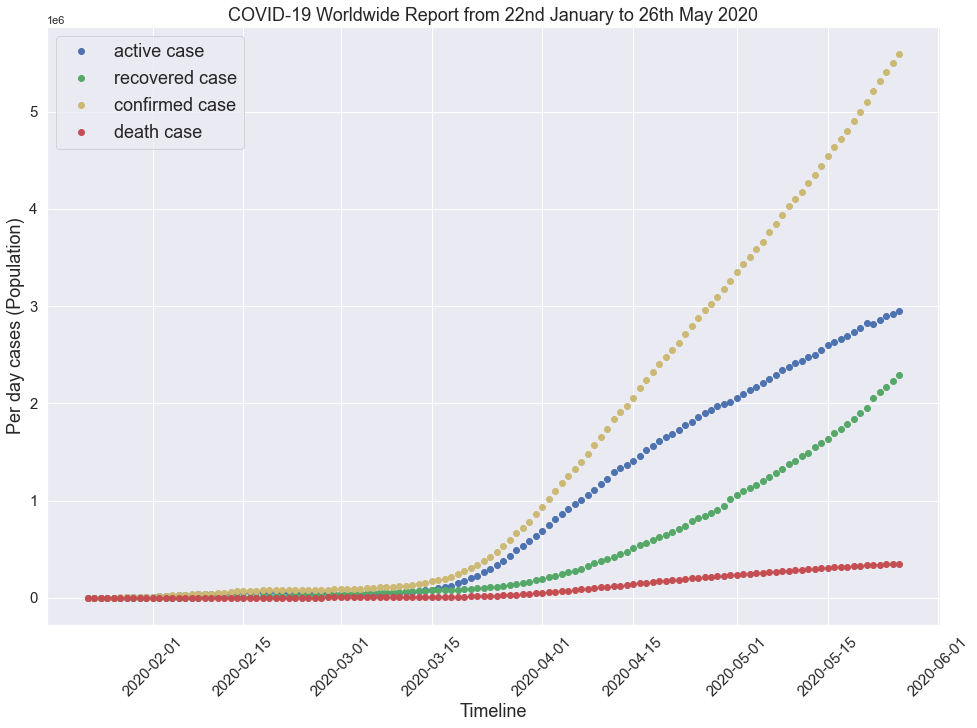

In [85]:
stats_per_day = ds.groupby('Date')[['Confirmed', 'Recovered', 'Deaths','Active']].agg(['sum'])
t = np.array(stats_per_day.index)
active = np.array(stats_per_day['Active'])
recovered = np.array(stats_per_day['Recovered'])
confirmed =  np.array(stats_per_day['Confirmed'])
deaths =  np.array(stats_per_day['Deaths'])

fig = plt.figure(figsize = (16,11))
ax = fig.add_subplot(111)
ax.plot_date(t, active, 'bo', linewidth = 2)
ax.plot_date(t, recovered, 'go', linewidth = 2)
ax.plot_date(t, confirmed, 'yo', linewidth = 2)
ax.plot_date(t, deaths, 'ro', linewidth = 2)
plt.legend(['active case','recovered case','confirmed case','death case'],  prop={'size': 18})

plt.xticks(rotation=45, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Timeline', fontsize= 18)
plt.ylabel('Per day cases (Population)', fontsize=18)
plt.title('COVID-19 Worldwide Report from 22nd January to 26th May 2020', fontsize=18)
plt.show()

* ### Based on above Worldwide report of COVID-19, we can observe the exponential growth of the disease, that starts rather slow initially and then exponentially increases. And like any exponential growth, this report shows a 'tipping point' that starts between 15th March and 1st April on the timeline.


* ### Also, we can analyse that, due to lockdowns and government response to the pendamic on various parts of the world, the  Worldwide  'rate' of recovery per-day increased and that of active case per-day almost remained constant, which further helped the 'rate' of  no. of death case per day to slow down a bit. However, due to COVID-19 incubation period and lack of testing, the 'rate' at which new/confirmed cases per-day increases very high contributing to overall active, recovery and  deaths cases per-day.


* ### Therefore, this 'rate' at which the new/confirmed case per-day if continued, then would lead to high risk of active cases to infect the healthy part of the society, which leads the growth to accerate even more in an exponential fashion.


*  ### Hence, in order to control the pandemic, there must be strict protocols of testing and identification of confirmed cases and isolation of those from recovered or healthy part of the society. And by doing so, it is very important to saturate (or bring down the rate/slope) of the above active case curve, before the health-care capacity of the countries reaches its limits. 

In [86]:
stats_per_day.columns = ['Confirmed','Recovered','Deaths','Active']

In [87]:
stats_per_day

,Confirmed,Recovered,Deaths,Active
Date,,,,
2020-01-22,555,28,17,510
2020-01-23,654,30,18,606
2020-01-24,941,36,26,879
2020-01-25,1434,39,42,1353
2020-01-26,2118,52,56,2010
...,...,...,...,...
2020-05-22,5210817,2056643,338160,2816014
2020-05-23,5310362,2112185,342097,2856080
2020-05-24,5407613,2168563,345059,2893991


## Piecewise Curve fitting for Modelling Death Cases per-day

In [88]:
# splitting time-series data sequentially for fitting and tesing
xtrain_d, xtest_d, ytrain_d, ytest_d = train_test_split(np.arange(1,127,1),
                                               stats_per_day['Deaths'].values,
                                               test_size= 0.1, 
                                               shuffle= False)

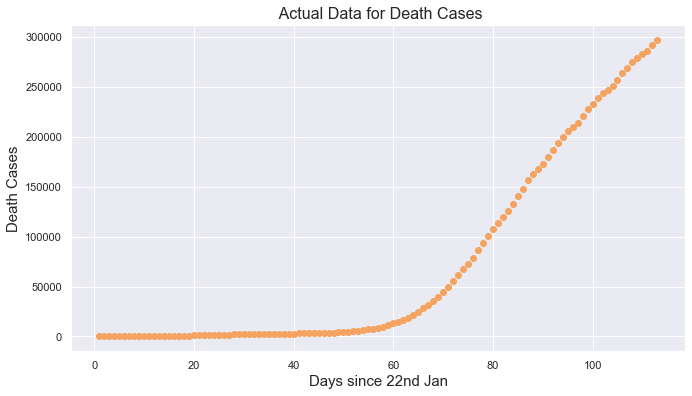

In [89]:
plt.figure(figsize = (11,6))
plt.scatter(xtrain_d , ytrain_d, color ='sandybrown')
plt.xlabel('Days since 22nd Jan', fontsize = 15)
plt.ylabel('Death Cases', fontsize = 15)
plt.title(' Actual Data for Death Cases', fontsize = 16)
plt.show()

### Based on the above data, we shall partition the data from 80th day. Since, after 80th day we can assume that active cases deviates from the exponential model and follows the logarithmic model. Furthermore, the logarithmic model can imply the fact that the virus won't be able to infect the whole population and curve will be flattened eventually.

In [90]:
# partitioning time-series data sequentially for piecewise curve fitting
x1d = xtrain_d[:80]
y1d = ytrain_d[:80]
x2d = xtrain_d[80:]
y2d = ytrain_d[80:]

In [91]:
# defining generalized and piecewise exponential and logarithmic function for fitting the data
def exp(x,a,b,c,d):
    return a + b*np.exp(c*x+d)
def log(x, a, b, c,d):
    return a+ b*np.log(c*x+d)

In [92]:
# fitting exponential curve on the data
param1d, cov1d = curve_fit(exp, x1d, y1d, maxfev = 10000)
y_fit1d = exp(x1d, *param1d)

In [93]:
# fitting logarithmic curve on the data
param2d, cov2d = curve_fit(log, x2d, y2d)
y_fit2d = log(x2d, *param2d)

In [94]:
# defining function to build piecewise function for death case modelling
def death_case_model(x, param1d, param2d):
    
    def death_nday_check(x, param1d, param2d):
        if x > 80:
            return log(x, *param2d)
        else:
            return exp(x, *param1d)

    if len(x) > 1:
        return [death_nday_check(i, param1d, param2d) for i in x]
    elif len(x) == 1:
        return death_nday_check(x, param1d, param2d)

## Piecewise Curve fitting for Modelling Active Cases per-day

In [95]:
# splitting time-series data sequentially for fitting and tesing
xtrain_a, xtest_a, ytrain_a, ytest_a = train_test_split(np.arange(1,127,1),
                                               stats_per_day['Active'].values,
                                               test_size= 0.1, 
                                               shuffle= False)

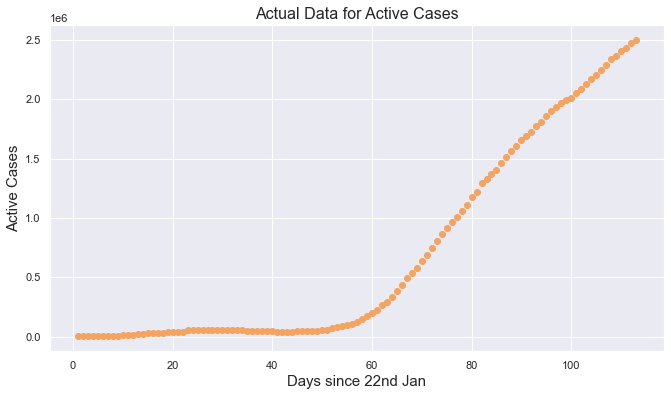

In [96]:
plt.figure(figsize = (11,6))
plt.scatter(xtrain_a , ytrain_a, color ='sandybrown')
plt.xlabel('Days since 22nd Jan', fontsize = 15)
plt.ylabel('Active Cases', fontsize = 15)
plt.title('Actual Data for Active Cases', fontsize = 16)
plt.show()

 ### Based on the above data, we shall partition the data from 70th day.

In [97]:
# partitioning time-series data sequentially for piecewise curve fitting
x1a = xtrain_a[:70]
y1a = ytrain_a[:70]
x2a = xtrain_a[70:]
y2a = ytrain_a[70:]

In [98]:
# fitting exponential curve on the data
param1a, cov1a = curve_fit(exp, x1a, y1a, maxfev = 10000)
y_fit1a = exp(x1a, *param1a)

In [99]:
# fitting logarithmic curve on the data
param2a, cov2a = curve_fit(log, x2a, y2a)
y_fit2a = log(x2a, *param2a)

In [100]:
# defining function to build piecewise function for active case modelling
def active_case_model(x, param1a, param2a):
    
    def active_nday_check(x, param1a, param2a):
        if x > 70:
            return log(x, *param2a)
        else:
            return exp(x, *param1a)

    if len(x) > 1:
        return [active_nday_check(i, param1a, param2a) for i in x]
    elif len(x) == 1:
        return active_nday_check(x, param1a, param2a)

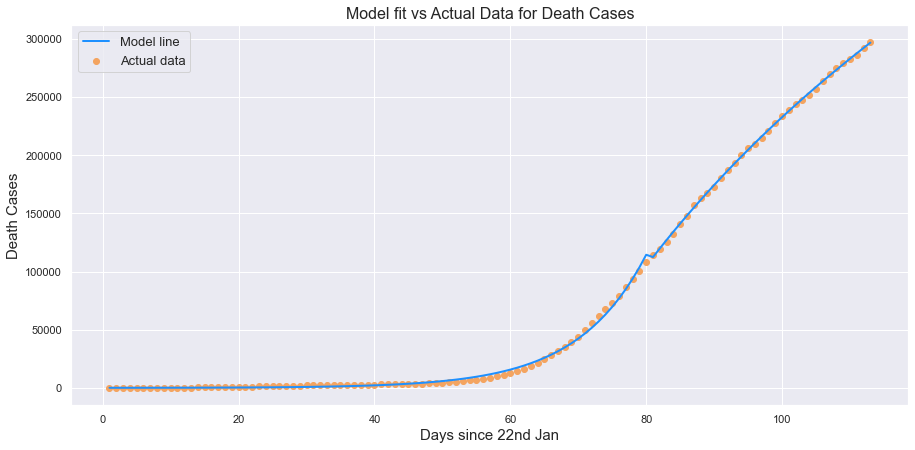

In [101]:
plt.figure(figsize = (15,7))
plt.plot(xtrain_d, death_case_model(xtrain_d, param1d,param2d), color ='dodgerblue', linewidth= 2) 
plt.scatter(xtrain_d , ytrain_d, color ='sandybrown')
plt.legend(['Model line','Actual data'], fontsize = 13)
plt.xlabel('Days since 22nd Jan', fontsize = 15)
plt.ylabel('Death Cases', fontsize = 15)
plt.title('Model fit vs Actual Data for Death Cases', fontsize = 16)
plt.show()

### The above graph, we see that our piecewise function is able to fit the data well for modelling Death cases.

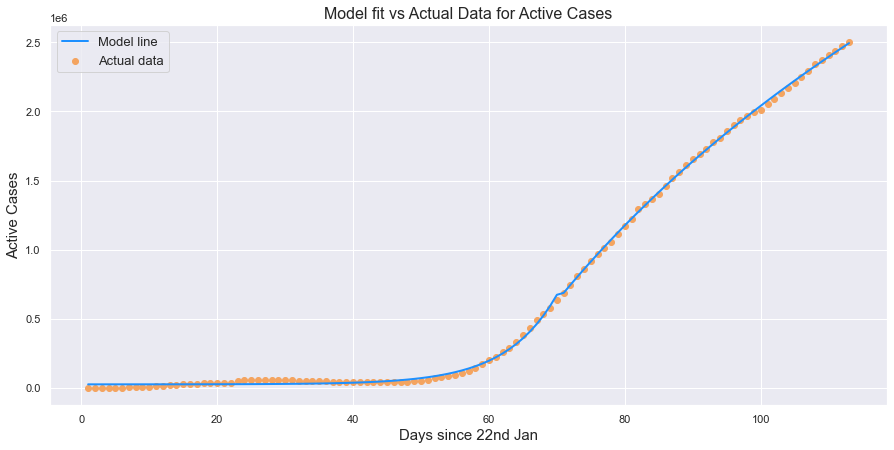

In [102]:
plt.figure(figsize = (15,7))
plt.plot(xtrain_a, active_case_model(xtrain_a, param1a, param2a), color ='dodgerblue' , linewidth= 2) 
plt.scatter(xtrain_a , ytrain_a, color ='sandybrown')
plt.legend(['Model line','Actual data'], fontsize = 13)
plt.xlabel('Days since 22nd Jan', fontsize = 15)
plt.ylabel('Active Cases', fontsize = 15)
plt.title('Model fit vs Actual Data for Active Cases', fontsize = 16)
plt.show()

### The above graph, we see that our piecewise function is able to fit the data well for modelling Active cases.

In [103]:
# code for calculating the 95% prediction interval based on test results for death cases
sum_errs = np.sum((ytest_d - active_case_model(xtest_d, param1d, param2d))**2)
stdev = np.sqrt(1/(len(ytest_d)-2) * sum_errs)
interval_d = 1.96 * stdev
interval_d

3492.9632082624335

In [104]:
# code for calculating the 95% prediction interval based on test results for active cases
sum_errs = np.sum((ytest_a - active_case_model(xtest_a, param1a, param2a))**2)
stdev = np.sqrt(1/(len(ytest_a)-2) * sum_errs)
interval_a = 1.96 * stdev
interval_a

113854.32201541285

## Prediction/Forecast of  Death and Active cases per-day based on time-series data

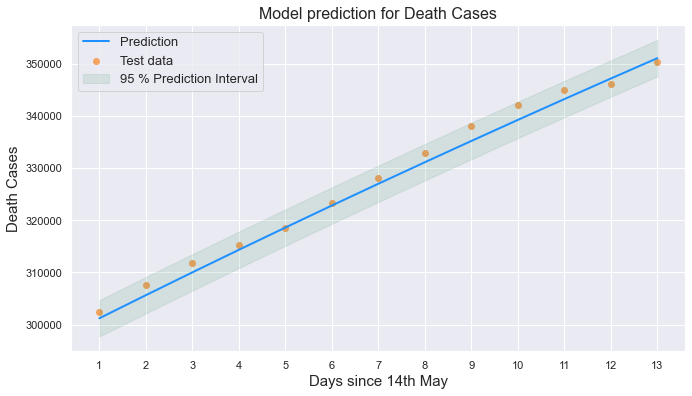

In [105]:
plt.figure(figsize = (11,6))
plt.plot(xtest_d, death_case_model(xtest_d, param1d,param2d), color ='dodgerblue'  , linewidth= 2) 
plt.scatter(xtest_d , ytest_d, color ='sandybrown')
plt.fill_between(xtest_d, (np.array(death_case_model(xtest_d, param1d,param2d))-interval_d),
                 (np.array(death_case_model(xtest_d, param1d,param2d))+interval_d), color='seagreen', alpha=0.12)

plt.legend(['Prediction','Test data', '95 % Prediction Interval'], fontsize = 13)
plt.xlabel('Days since 14th May', fontsize = 15)
plt.xticks(xtest_d,[str(i) for i in range(1,14)])
plt.ylabel('Death Cases', fontsize = 15)
plt.title('Model prediction for Death Cases', fontsize = 16)
plt.show()

### From above prediction result, we  see that our model is able to fit the the unseen test data for 13 days.

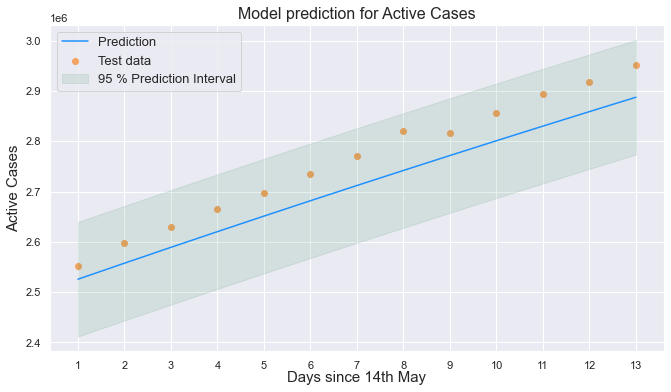

In [106]:
plt.figure(figsize = (11,6))
plt.plot(xtest_a, active_case_model(xtest_a, param1a,param2a), color ='dodgerblue') 

plt.scatter(xtest_a , ytest_a, color ='sandybrown')

plt.fill_between(xtest_a, (np.array(active_case_model(xtest_a, param1a,param2a))-interval_a),
                 (np.array(death_case_model(xtest_a, param1a,param2a))+interval_a), color='seagreen', alpha=0.12)

plt.legend(['Prediction','Test data', '95 % Prediction Interval'], fontsize = 13)
plt.xlabel('Days since 14th May', fontsize = 15, labelpad = 0)
plt.xticks(xtest_a,[str(i) for i in range(1,14)])
plt.ylabel('Active Cases', fontsize = 15)
plt.title('Model prediction for Active Cases', fontsize = 16)
plt.show()

### From above prediction result, we  see that most of the data points lies above the prediction line, therefore, for better-forecast of active cases, it is recommended to use the upper-bound values from the prediction interval.

## Conclusion

* ### Based on data for initial outbreak of COVID-19 worldwide, we have analysed the case with respect to country and timeline.
* ### We have build the predictive model for both death and active cases of COVID-19, based on non-linear piecewise functions.
* ### It is worth noting that the above prediction results are based on the past data and may not accurately predict the future. Moreover, while actual forcasting, since the prediction on test data was of only 13 days, therefore, the model can be used for prediction/forecast for at most 2 weeks. Also, the confidence interval of 95% or greater must be considered for decision making. 